In [11]:
import numpy as np

def getNAK_System(x_coords, y_coords):
    n = x_coords.size # Number of points

    # delta_i = x_(i+1) - x_i
    delta = np.array([x_coords[i]-x_coords[i-1] for i in range(1,n)])

    # BigDelta_i = y_(i+1) - y_i
    BigDelta = np.array([y_coords[i]-y_coords[i-1] for i in range(1,n)])

    A = np.zeros((n,n))
    # Lower diagonal
    lowerDiag = delta[:-1]
    np.fill_diagonal(A[1:,:-1], lowerDiag)
    
    # Main diagonal
    mainDiag = 2 * (delta[:-1] + delta[1:])
    np.fill_diagonal(A[1:-1], mainDiag)
    
    # Upper diagonal
    upperDiag = delta[1:]
    np.fill_diagonal(A[:-1,1:], upperDiag)

    # Not-a-knot conditions
    A[0, :3] = [delta[1], -(delta[0] + delta[1]), delta[0]]
    A[-1, -3:] = [delta[-2], -(delta[-3] + delta[-2]), delta[-3]]

    b = np.zeros(n)
    b[1:-1] = 3 * (BigDelta[1:]/delta[1:] - BigDelta[:-1]/delta[:-1])

    return A, b

x = np.array([1,2,4,5.,7,9])
y = np.array([2,1,4,3.,0,2])
A, b = getNAK_System(x,y)
print(A)
print(b)


[[ 2. -3.  1.  0.  0.  0.]
 [ 6.  0.  1.  0.  0.  0.]
 [ 0.  6.  0.  2.  0.  0.]
 [ 0.  0.  6.  0.  2.  0.]
 [ 0.  0.  0.  8.  0.  2.]
 [ 0.  0.  0.  2. -3.  1.]]
[ 0.   7.5 -7.5 -1.5  7.5  0. ]


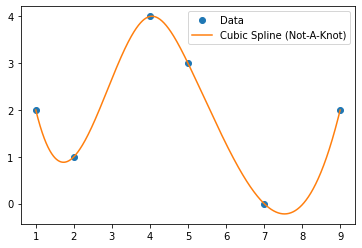

In [13]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([1, 2, 4, 5., 7, 9])
y = np.array([2, 1, 4, 3., 0, 2])

# Create a cubic spline interpolation with not-a-knot boundary condition
cs = CubicSpline(x, y)

# For visualization
xs = np.linspace(min(x), max(x), 1000)
ys = cs(xs)

plt.plot(x, y, 'o', label='Data')
plt.plot(xs, ys, label='Cubic Spline (Not-A-Knot)')
plt.legend()
plt.show()


In [17]:
import numpy as np
from spline.core import cubic_spline_matrix

x = np.array([1, 2, 4, 5., 7, 9])

# The function cubic_spline_matrix from the spline library can be used to obtain the matrix A
A = cubic_spline_matrix(x, bc_type="not-a-knot")
print(A)


ModuleNotFoundError: No module named 'spline'